# Clasificación Básica: Predecir una imagen de moda

Esta Guia entrena un modelo de red neuronal para clasificar imagenes de ropa como, tennis y camisetas.

Esta Guia usa [tf.keras](https://www.tensorflow.org/guide/keras), un API de alto nivel para construir y entrenar modelos en Tensorflow.

## Importar el set de datos de moda de MNIST

Esta guia usa el set de datos de [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist)
que contiene mas de 70,000 imagenes en 10 categorias. Las imagenes muestran articulos individuales de ropa a una resolucion baja (28 por 28 pixeles) como se ve aca:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Para importar y cargar el set de datos de MNIST directamente de TensorFlow:

_pista: keras.datasets_

In [8]:
pip install tensorflow_datasets 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [98]:
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt 

In [99]:
print(tf.__version__) 

2.17.0


In [100]:
# CARGAR UN CONJUNTO DE DATOS 

In [ ]:
'''Moda MNIST esta construida como un reemplazo para el set de datos clasico MNIST casi siempre utilizado como el "Hola Mundo" de programas
de aprendizaje automatico (ML) para computo de vision. El set de datos de MNIST contiene imagenes de digitos escrito a mano (0, 1, 2, etc.)
en un formato identico al de los articulos de ropa que va a utilizar aca.

Esta guia utiliza Moda MNIST para variedad y por que es un poco mas retador que la regular MNIST. Ambos set de datos son relativamente
pequenos y son usados para verificar que el algoritmo funciona como debe.

Aca, 60,000 imagenes son usadas para entrenar la red neuronal y 10,000 imagenes son usadas para evaluar que tan exacto aprendia la red a
clasificar imagenes. Pueden acceder al set de moda de MNIST directamente desde TensorFlow. Para importar y cargar el set de datos de
 MNIST directamente de TensorFlow:'''

In [ ]:
# IMPORTAR EL SET DE DATOS 

In [101]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() 

In [21]:
'''link textAl cargar el set de datos retorna cuatro arreglos en NumPy:

El arreglo train_images y train_labels son los arreglos que training set—el modelo de datos usa para aprender.
el modelo es probado contra los arreglos test set, el test_images, y test_labels.
Las imagenes son 28x28 arreglos de NumPy, con valores de pixel que varian de 0 a 255. Los labels son un arreglo de integros, que van del 0
al 9. Estos corresponden a la class de ropa que la imagen representa.'''

'link textAl cargar el set de datos retorna cuatro arreglos en NumPy:\n\nEl arreglo train_images y train_labels son los arreglos que training set—el modelo de datos usa para aprender.\nel modelo es probado contra los arreglos test set, el test_images, y test_labels.\nLas imagenes son 28x28 arreglos de NumPy, con valores de pixel que varian de 0 a 255. Los labels son un arreglo de integros, que van del 0\nal 9. Estos corresponden a la class de ropa que la imagen representa.'

In [102]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [103]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [104]:
train_images 

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [105]:
test_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [29]:
'''Cada imagen es mapeada a una unica etiqueta. Ya que los Class names no estan incluidoen el dataset, almacenelo aca para usarlos luego
cuando se visualicen las imagenes:'''

'Cada imagen es mapeada a una unica etiqueta. Ya que los Class names no estan incluidoen el dataset, almacenelo aca para usarlos luego\ncuando se visualicen las imagenes:'

In [133]:
import pandas as pd 

# Definir el diccionario de etiquetas para el conjunto de datos Fashion MNIST
class_names = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

# Convertir el diccionario en un DataFrame
df_class_names = pd.DataFrame(list(class_names.items()), columns=['Label', 'Category'])

# Imprimir el DataFrame sin la columna de índice adicional
print(df_class_names.to_string(index=False)) 

 Label    Category
     0 T-shirt/top
     1     Trouser
     2    Pullover
     3       Dress
     4        Coat
     5      Sandal
     6       Shirt
     7     Sneaker
     8         Bag
     9  Ankle boot


La *class* de ropa que la imagen representa.

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Cada imagen es mapeada a una unica etiqueta. Ya que los *Class names* no estan incluidos en el dataset. Los guardamos en la siguiente lista:

In [107]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
len(class_names)

10

## Explore el set de datos

* ¿Cuántas imágenes hay en train?

In [30]:
train_images.shape # REPRESENTADAS COMO PIXELES DE 28 X 28 

(60000, 28, 28)

* ¿Y en test? 

In [31]:
test_images.shape # REPRESENTADAS COMO PIXELES DE 28 X 28 

(10000, 28, 28)

* ¿De cuántos pixels se compone cada imagen? 

In [115]:
train_images[0].size # 28 x 28 

784

* ¿Cuáles son los valores de los labels? 

In [131]:
# Definir el diccionario de etiquetas para el conjunto de datos Fashion MNIST
class_names = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

# Imprimir los números de etiquetas y sus nombres correspondientes
for label, name in class_names.items():
    print(f'{label}: {name}')


0: T-shirt/top
1: Trouser
2: Pullover
3: Dress
4: Coat
5: Sandal
6: Shirt
7: Sneaker
8: Bag
9: Ankle boot


## Pre-procese el set de datos

Inspecciona y representa la primera imagen del dataset de train. Para ello, utiliza la función `imshow` de matplotlib.

In [108]:
import matplotlib.pyplot as plt 

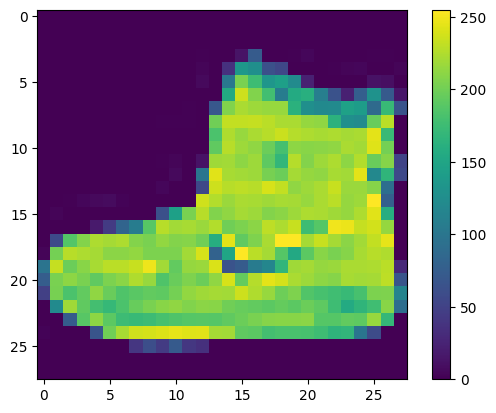

In [109]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show() 

Escala los conjuntos de train y test para que vayan del 0 al 1. No hace falta usar ninguna librería. Con realizar una división en cada conjunto será suficiente.

In [110]:
train_images = train_images / 255.0

test_images = test_images / 255.0 

Para verificar que el set de datos está en el formato adecuado y que están listos para construir y entrenar la red, vamos a desplegar las primeras 25 imágenes del *training set* y despleguemos el nombre de cada clase debajo de cada imagen.

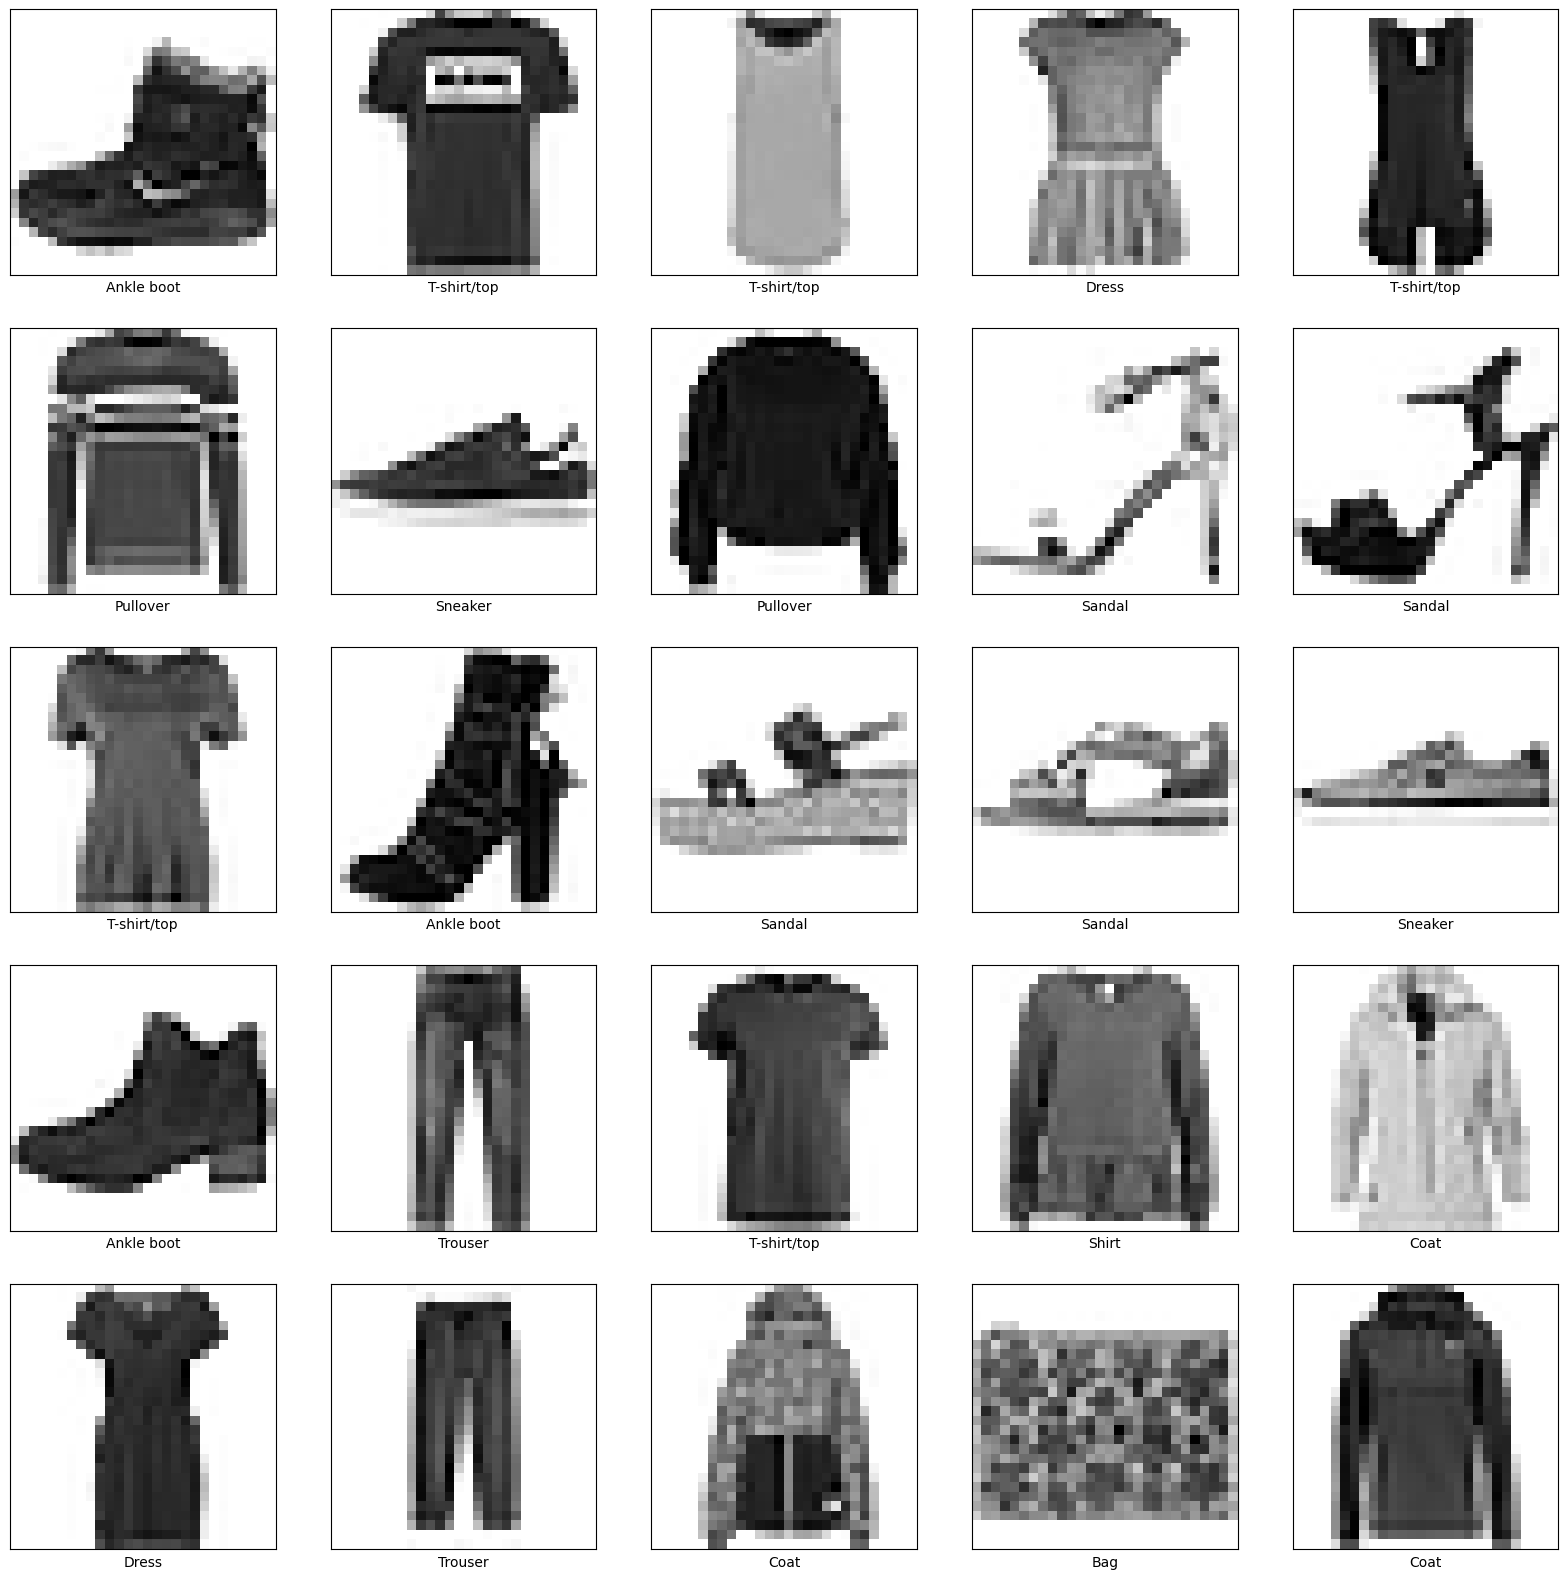

In [111]:
plt.figure(figsize=(20,20))
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap="binary")
    plt.xlabel(class_names[train_labels[i]]) 
plt.show() 

## Construir el Modelo

Construir la red neuronal requiere configurar las capas del modelo y luego compilar el modelo.

### Configurar las Capas
Construye todas las capas del modelo.

In [43]:
'''Los bloques de construccion basicos de una red neuronal son las capas o layers. Las capas extraen representaciones de el set de datos
que se les alimentan. Con suerte, estas representaciones son considerables para el problema que estamos solucionando.

La mayoria de aprendizaje profundo consiste de unir capas sencillas. La mayoria de las capas como tf.keras.layers.Dense, tienen parametros
que son aprendidos durante el entrenamiento.''' 

'Los bloques de construccion basicos de una red neuronal son las capas o layers. Las capas extraen representaciones de el set de datos\nque se les alimentan. Con suerte, estas representaciones son considerables para el problema que estamos solucionando.\n\nLa mayoria de aprendizaje profundo consiste de unir capas sencillas. La mayoria de las capas como tf.keras.layers.Dense, tienen parametros\nque son aprendidos durante el entrenamiento.'

In [112]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
]) 

model 

C:\Users\rodri\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


<Sequential name=sequential_7, built=True>

In [46]:
'''La primera capa de esta red, tf.keras.layers.Flatten, transforma el formato de las imagenes de un arreglo bi-dimensional (de 28 por 28
pixeles) a un arreglo uni dimensional (de 28*28 pixeles = 784 pixeles). Observe esta capa como una capa no apilada de filas de pixeles en
la misma imagen y alineandolo. Esta capa no tiene parametros que aprender; solo reformatea el set de datos.

Despues de que los pixeles estan "aplanados", la secuencia consiste de dos capastf.keras.layers.Dense. Estas estan densamente conectadas,
o completamente conectadas. La primera capa Dense tiene 128 nodos (o neuronas). La segunda (y ultima) capa es una capa de 10 nodos softmax
que devuelve un arreglo de 10 probabilidades que suman a 1. Cada nodo contiene una calificacion que indica la probabilidad que la actual
imagen pertenece a una de las 10 clases.'''

'La primera capa de esta red, tf.keras.layers.Flatten, transforma el formato de las imagenes de un arreglo bi-dimensional (de 28 por 28\npixeles) a un arreglo uni dimensional (de 28*28 pixeles = 784 pixeles). Observe esta capa como una capa no apilada de filas de pixeles en\nla misma imagen y alineandolo. Esta capa no tiene parametros que aprender; solo reformatea el set de datos.\n\nDespues de que los pixeles estan "aplanados", la secuencia consiste de dos capastf.keras.layers.Dense. Estas estan densamente conectadas,\no completamente conectadas. La primera capa Dense tiene 128 nodos (o neuronas). La segunda (y ultima) capa es una capa de 10 nodos softmax\nque devuelve un arreglo de 10 probabilidades que suman a 1. Cada nodo contiene una calificacion que indica la probabilidad que la actual\nimagen pertenece a una de las 10 clases.'

### Compila el modelo

Antes de que el modelo este listo para entrenar , se necesitan algunas configuraciones más. Estas son agregadas durante el paso de compilacion del modelo:

* *Loss function* —Esto mide que tan exacto es el modelo durante el entrenamiento. Quiere minimizar esta función para dirigir el modelo en la dirección adecuada.
* *Optimizer* — Esto es cómo el modelo aprende basado en el set de datos que ve y la función de pérdida.
* *Metrics* — Se usan para monitorear los pasos de entrenamiento y de pruebas.


Como es un problema de clasificación multiclase, tendrás que usar `sparse_categorical_crossentropy` como función de coste. En cuanto a las métricas, usa simplemente `accuracy`.

In [113]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']) 

In [48]:
model.summary() 

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

## Entrenar el Modelo
Empieza entrenándolo con 10 epochs. Prueba con más

In [49]:
'''Entrenar el modelo de red neuronal requiere de los siguientes pasos:

Entregue los datos de entrenamiento al modelo. En este ejemplo , el set de datos de entrenamiento estan en los arreglos train_images y
train_labels.
el modelo aprende a asociar imagenes y etiquetas.
Usted le pregunta al modelo que haga predicciones sobre un set de datos que se encuentran en el ejemplo,incluido en el arreglo test_images.
Verifique que las predicciones sean iguales a las etiquetas de el arreglotest_labels.
Para comenzar a entrenar, llame el metodo model.fit, es llamado asi por que fit (ajusta) el modelo a el set de datos de entrenamiento:'''

'Entrenar el modelo de red neuronal requiere de los siguientes pasos:\n\nEntregue los datos de entrenamiento al modelo. En este ejemplo , el set de datos de entrenamiento estan en los arreglos train_images y\ntrain_labels.\nel modelo aprende a asociar imagenes y etiquetas.\nUsted le pregunta al modelo que haga predicciones sobre un set de datos que se encuentran en el ejemplo,incluido en el arreglo test_images.\nVerifique que las predicciones sean iguales a las etiquetas de el arreglotest_labels.\nPara comenzar a entrenar, llame el metodo model.fit, es llamado asi por que fit (ajusta) el modelo a el set de datos de entrenamiento:'

In [88]:
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.2) 

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7759 - loss: 0.6544 - val_accuracy: 0.8503 - val_loss: 0.4201
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8571 - loss: 0.3999 - val_accuracy: 0.8627 - val_loss: 0.3806
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8766 - loss: 0.3427 - val_accuracy: 0.8773 - val_loss: 0.3415
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8816 - loss: 0.3189 - val_accuracy: 0.8736 - val_loss: 0.3495
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8914 - loss: 0.2998 - val_accuracy: 0.8741 - val_loss: 0.3533
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8937 - loss: 0.2852 - val_accuracy: 0.8788 - val_loss: 0.3296
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8999 - loss: 0.2674 - val_accuracy: 0.8842 - val_loss: 0.3290
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9024 - loss: 0.2591 - 

In [134]:
# HACER EL GRÁFICO QUE SE PARECE A LA FUNCIÓN EXPONENCIAL 

## Evaluar Accuracy
Prueba el rendimiento del modelo con los datos de test

In [89]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nPrecisión en el conjunto de prueba:', test_acc) 

313/313 - 0s - 754us/step - accuracy: 0.8809 - loss: 0.3518

Precisión en el conjunto de prueba: 0.8809000253677368


In [54]:
'''Resulta que la exactitud sobre el set de datos es un poco menor que la exactitud sobre el set de entrenamiento. Esta diferencia entre
el entrenamiento y el test se debe a overfitting (sobre ajuste). Sobre ajuste sucede cuando un modelo de aprendizaje de maquina (ML) tiene
un rendimiento peor sobre un set de datos nuevo, que nunca antes ha visto comparado con el de entrenamiento.'''

'Resulta que la exactitud sobre el set de datos es un poco menor que la exactitud sobre el set de entrenamiento. Esta diferencia entre\nel entrenamiento y el test se debe a overfitting (sobre ajuste). Sobre ajuste sucede cuando un modelo de aprendizaje de maquina (ML) tiene\nun rendimiento peor sobre un set de datos nuevo, que nunca antes ha visto comparado con el de entrenamiento.'

## Hacer predicciones

Con el modelo entrenado puedes usarlo para hacer predicciones sobre imagenes.

In [114]:
'''El objetivo de este código es convertir las salidas del modelo en probabilidades y luego obtener las etiquetas predichas para el
 conjunto de imágenes de prueba.
  
1.- Crear un modelo de probabilidad.  
- tf.keras.Sequential: Sequential es una forma de agrupar una pila lineal de capas en un modelo. Aquí, estamos creando un nuevo modelo 
secuencial.
- model: Este es el modelo previamente entrenado. Tiene una capa final con 10 neuronas que emiten logits (valores sin procesar).
- tf.keras.layers.Softmax(): Esta capa toma los logits del modelo y los convierte en probabilidades. La función softmax transforma los 
logits en un vector de probabilidades, donde cada valor está entre 0 y 1, y la suma de todas las probabilidades es 1.
    En resumen, probability_model es un nuevo modelo que toma la salida del modelo entrenado y aplica la función softmax para obtener
    probabilidades para cada clase. 
    
2.- Hacer Predicciones. 
- probability_model.predict(test_images): Este método toma el conjunto de imágenes de prueba (test_images) y pasa cada imagen a través del
modelo. Devuelve una matriz donde cada fila corresponde a una imagen de prueba y cada columna a la probabilidad de que esa imagen
pertenezca a una de las 10 clases. Es decir, si hay 10,000 imágenes de prueba y 10 clases, predictions tendrá una forma de (10000, 10). 

3.- Obtener las etiquetas predichas. 
- np.argmax(predictions, axis=1): np.argmax es una función de NumPy que devuelve los índices de los valores máximos a lo largo de un eje
especificado.
- predictions: Esta es la matriz de probabilidades obtenida en el paso anterior.
- axis=1: Este argumento especifica que queremos encontrar el índice del valor máximo a lo largo de las filas. En otras palabras, para cada 
imagen de prueba (cada fila), buscamos la clase con la probabilidad más alta.
    El resultado, predicted_labels, es un array de etiquetas predichas, donde cada elemento es la etiqueta de clase con la mayor
probabilidad para la correspondiente imagen de prueba.
'''

'El objetivo de este código es convertir las salidas del modelo en probabilidades y luego obtener las etiquetas predichas para el\n conjunto de imágenes de prueba.\n  \n1.- Crear un modelo de probabilidad.  \n- tf.keras.Sequential: Sequential es una forma de agrupar una pila lineal de capas en un modelo. Aquí, estamos creando un nuevo modelo \nsecuencial.\n- model: Este es el modelo previamente entrenado. Tiene una capa final con 10 neuronas que emiten logits (valores sin procesar).\n- tf.keras.layers.Softmax(): Esta capa toma los logits del modelo y los convierte en probabilidades. La función softmax transforma los \nlogits en un vector de probabilidades, donde cada valor está entre 0 y 1, y la suma de todas las probabilidades es 1.\n    En resumen, probability_model es un nuevo modelo que toma la salida del modelo entrenado y aplica la función softmax para obtener\n    probabilidades para cada clase. \n    \n2.- Hacer Predicciones. \n- probability_model.predict(test_images): Este mét

In [90]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1) 

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step


El modelo ha predecido la etiqueta para cada imagen en el set de datos de *test* (prueba). Miremos la primera prediccion:

In [91]:
predictions[0] 

array([1.2066485e-07, 1.2862111e-11, 2.5808802e-08, 1.7188730e-08,
       1.1919812e-07, 2.0967978e-03, 2.0467423e-06, 2.2580648e-02,
       1.4650695e-06, 9.7531885e-01], dtype=float32)

*Una* prediccion es un array de 10 numeros. Estos representan el nivel de "confianza" del modelo sobre las imagenes de cada uno de los 10 articulos de moda/ropa. Puedes revisar cual tiene el nivel mas alto de confianza:

Entonces, el modelo tiene mayor confianza que esta imagen es un bota de tobillo "ankle boot" o `class_names[9]`. Examinando las etiquetas de *test* o de pruebas muestra que esta clasificación es correcta:

In [92]:
test_labels[0] 

9

**Grafica** esto para poder ver todo el set de la prediccion de las 10 clases.

In [61]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue') 

Miremos la imagen [0], sus predicciones y el array de predicciones. Las etiquetas de predicción correctas estan en azul y las incorrectas están en rojo. El número entrega el porcentaje (sobre 100) para la etiqueta predecida.

Vamos a graficar multiples imagenes con sus predicciones. Notese que el modelo puede estar equivocado aun cuando tiene mucha confianza.

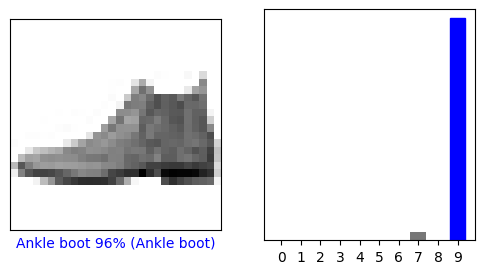

In [62]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show() 

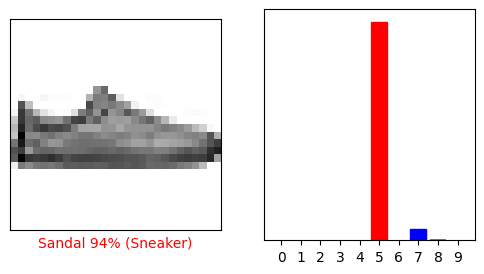

In [63]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Vamos a graficar multiples imagenes con sus predicciones. Notese que el modelo puede estar equivocado aun cuando tiene mucha confianza. 

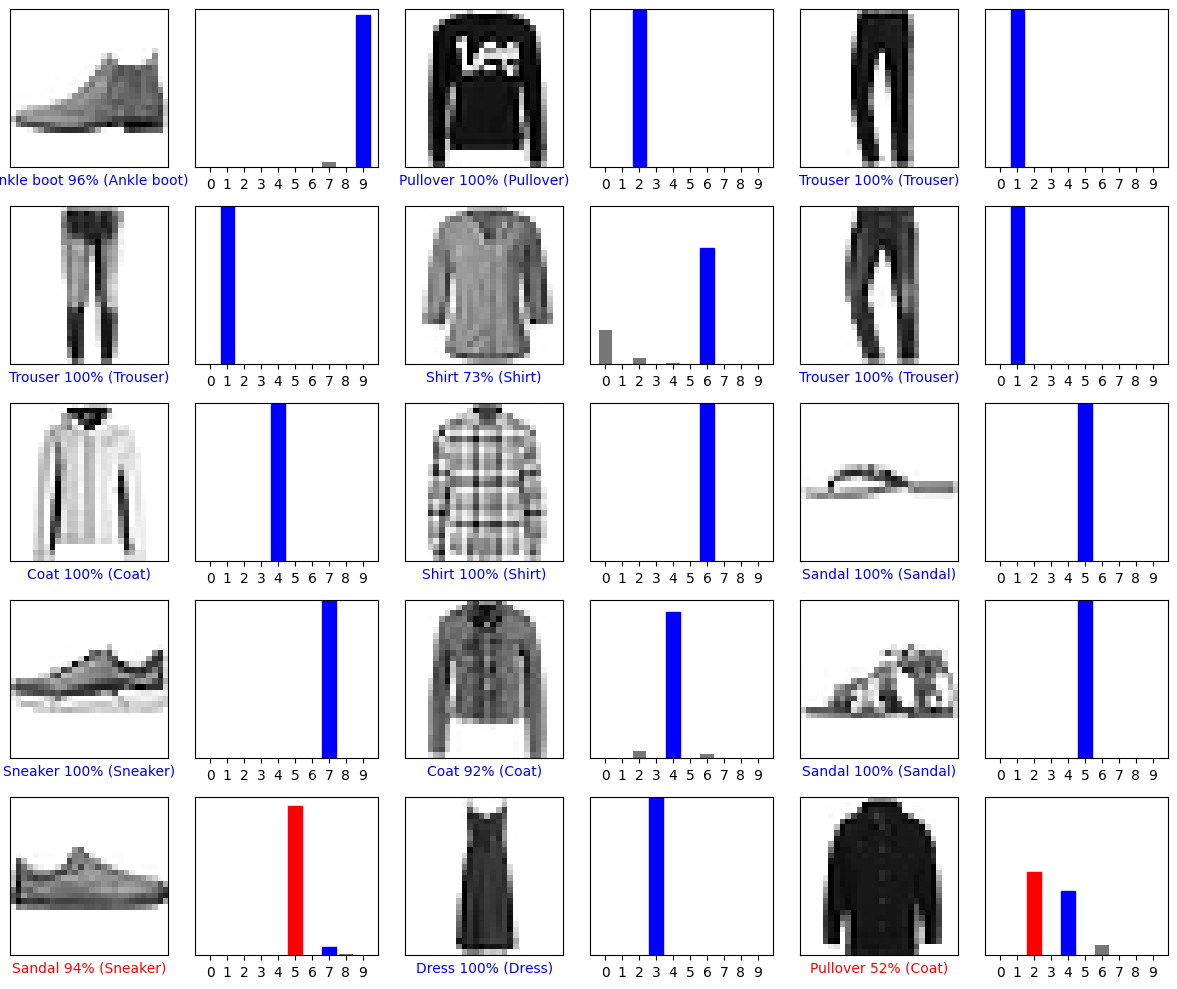

In [66]:
import matplotlib.pyplot as plt 

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show() 

Evalúa tu modelo con una matriz de confusión e interprétala.

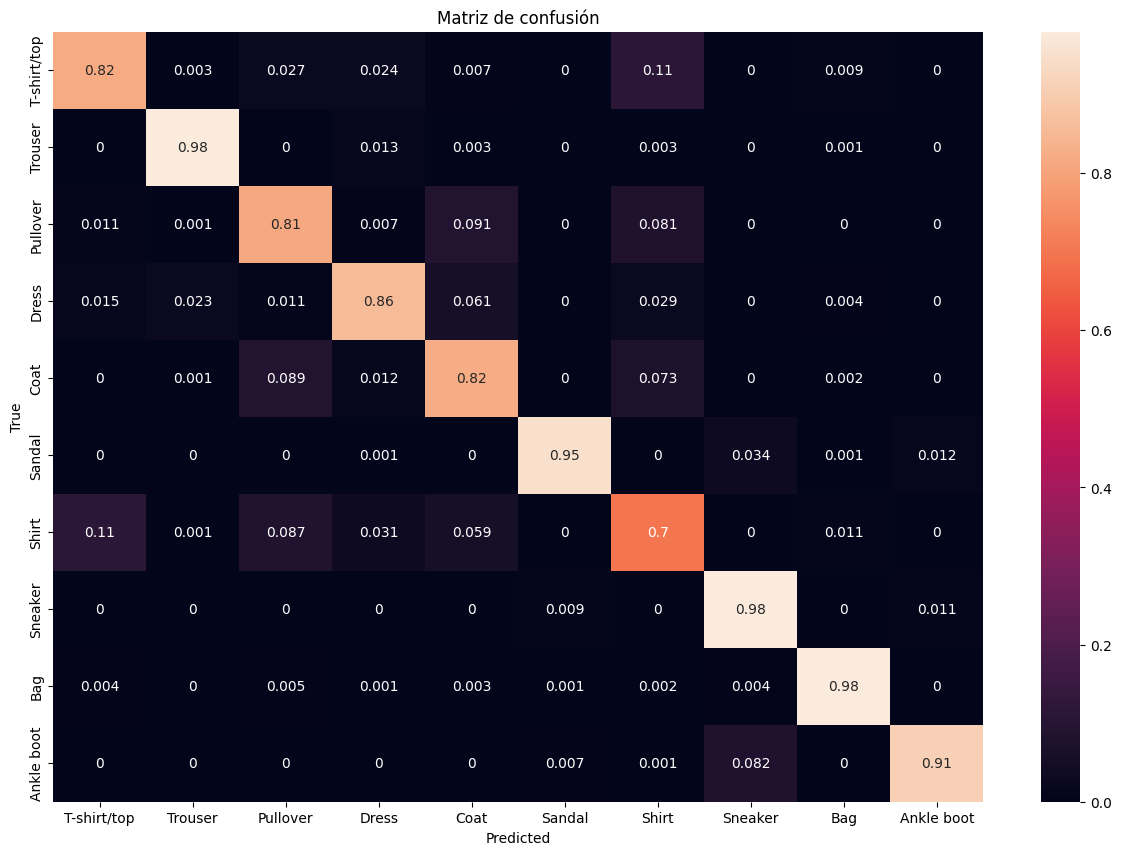

In [94]:
from sklearn.metrics import confusion_matrix 
import seaborn as sns 

c_mat = confusion_matrix( test_labels, predicted_labels, normalize='true')
plt.figure(figsize=(15,10))
sns.heatmap(c_mat, annot=True, xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted') 
plt.ylabel('True')
plt.title('Matriz de confusión')
plt.show() 

In [95]:
from sklearn.metrics import classification_report
print(classification_report(test_labels, predicted_labels)) 

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      1000
           1       0.97      0.98      0.98      1000
           2       0.79      0.81      0.80      1000
           3       0.91      0.86      0.88      1000
           4       0.79      0.82      0.80      1000
           5       0.98      0.95      0.97      1000
           6       0.70      0.70      0.70      1000
           7       0.89      0.98      0.93      1000
           8       0.97      0.98      0.98      1000
           9       0.98      0.91      0.94      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



Finalmente, usamos el modelo entrenado para hacer una prediccion sobre una única imagen.

In [96]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape) 

(28, 28)


Los modelos de tf.keras son optimizados sobre batch o bloques, o coleciones de ejemplos por vez. De acuerdo a esto, aunque use una unica imagen toca agregarla a una lista: 

In [97]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape) 

(1, 28, 28)


Ahora prediga la etiqueta correcta para esta imagen:

In [73]:
predictions_single = model.predict(img)

print(predictions_single) 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[[4.2239297e-04 7.6320693e-13 9.9547249e-01 3.2844692e-11 2.1623520e-03
  2.5185469e-13 1.9427466e-03 6.8208958e-18 1.7226337e-10 1.9298714e-15]]


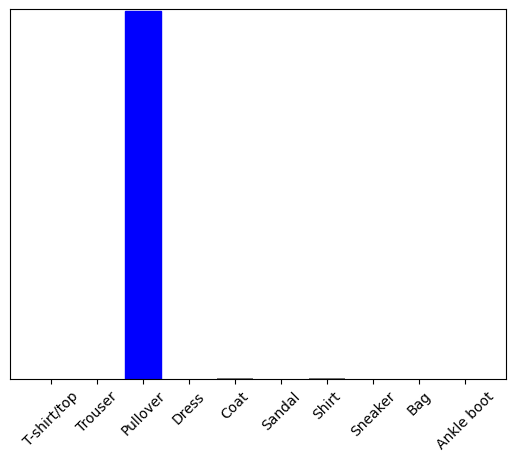

In [74]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45) 

model.predict retorna una lista de listas para cada imagen dentro del batch o bloque de datos. Tome la prediccion para nuestra unica imagen dentro del batch o bloque: 

In [75]:
np.argmax(predictions_single[0]) 

2

Y el modelo predice una etiqueta de 2. 